# Nueral Network Assi
Pankajan T.

Libraries used

In [60]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import Xception



### Dataset used

Here we use CIFAR10 of keras dataset that have extensive images of objects and animals containing 10 classes given below.

'airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'

### Goal
Th main objective to develpo the model that can classify images that are each of the above given label. We design the model to be more accurate as possible.

### Data preprocessing

In [159]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [63]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



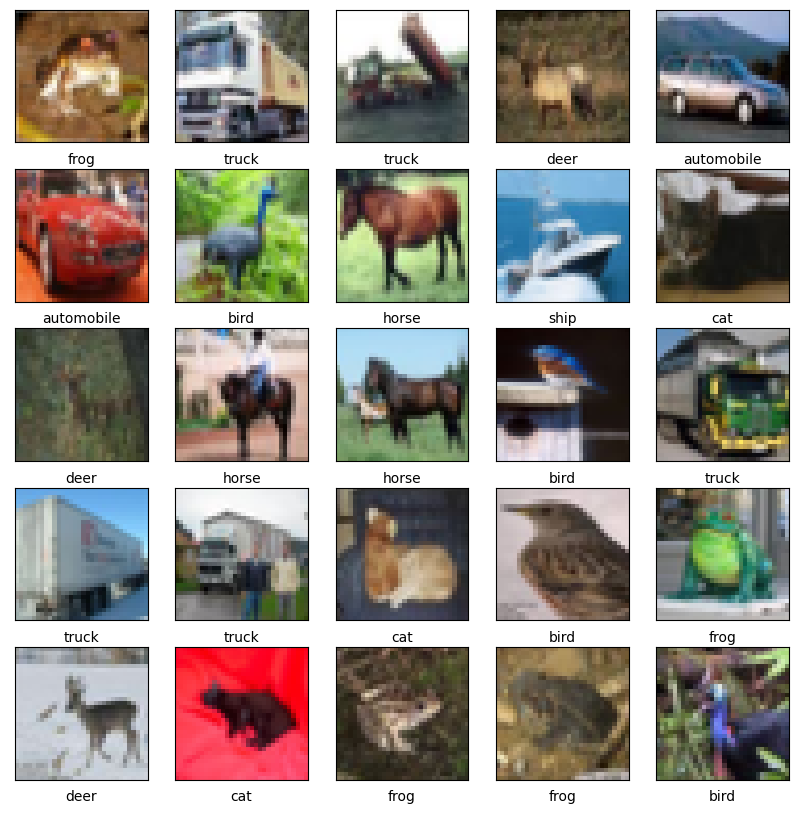

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Create the model architecture

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

### 1. CNN-1

In [66]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [67]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [68]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

In [69]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [71]:

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 64s 39ms/step - loss: 1.5172 - accuracy: 0.4492 - val_loss: 1.2107 - val_accuracy: 0.5664
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1524 - accuracy: 0.5923 - val_loss: 1.1139 - val_accuracy: 0.6004
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0142 - accuracy: 0.6434 - val_loss: 0.9941 - val_accuracy: 0.6488
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9161 - accuracy: 0.6779 - val_loss: 0.9707 - val_accuracy: 0.6632
Epoch 5/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8449 - accuracy: 0.7031 - val_loss: 0.8785 - val_accuracy: 0.6932
Epoch 6/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.7910 - accuracy: 0.7238 - val_loss: 0.9155 - val_accuracy: 0.6852
Epoch 7/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.7358 - accuracy: 0.7439 - val_loss: 0.890

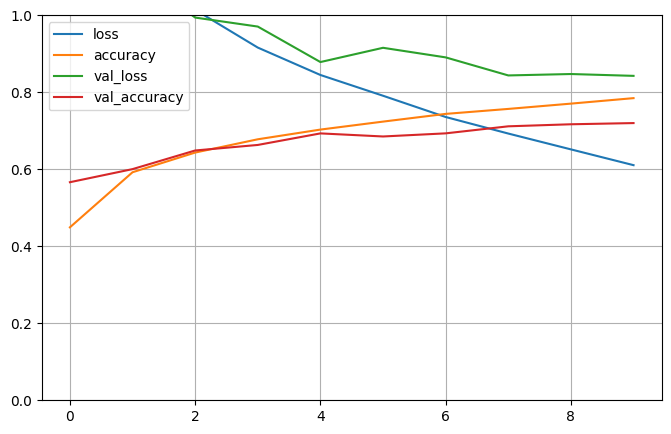

In [72]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [73]:
ev = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.8426 - accuracy: 0.7200


In [74]:
ev

[0.842645525932312, 0.7200000286102295]

In [75]:
keras.backend.clear_session

<function keras.backend.clear_session()>

In [154]:
del model

### 2. CNN with pooling

In [160]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(32, 32, 3)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))


In [161]:
model_a.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 7200)              0         
                                                                 
 dense_40 (Dense)            (None, 300)               2160300   
                                                                 
 dense_41 (Dense)            (None, 100)               30100     
                                                                 
 dense_42 (Dense)            (None, 10)                1010      
                                                     

In [162]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])



In [167]:
model_history_a = model_a.fit(x_train,y_train, epochs=20,batch_size= 64,
                    validation_data=(x_test, y_test))


Epoch 1/20
782/782 [==============================] - 42s 48ms/step - loss: 0.8253 - accuracy: 0.7142 - val_loss: 1.1542 - val_accuracy: 0.6026
Epoch 2/20
782/782 [==============================] - 37s 47ms/step - loss: 0.7874 - accuracy: 0.7271 - val_loss: 1.1062 - val_accuracy: 0.6202
Epoch 3/20
782/782 [==============================] - 36s 45ms/step - loss: 0.7520 - accuracy: 0.7380 - val_loss: 1.1140 - val_accuracy: 0.6140
Epoch 4/20
782/782 [==============================] - 32s 41ms/step - loss: 0.7165 - accuracy: 0.7542 - val_loss: 1.0424 - val_accuracy: 0.6421
Epoch 5/20
782/782 [==============================] - 28s 36ms/step - loss: 0.6830 - accuracy: 0.7620 - val_loss: 1.2674 - val_accuracy: 0.5852
Epoch 6/20
782/782 [==============================] - 30s 38ms/step - loss: 0.6450 - accuracy: 0.7790 - val_loss: 1.2177 - val_accuracy: 0.6073
Epoch 7/20
782/782 [==============================] - 39s 49ms/step - loss: 0.6115 - accuracy: 0.7902 - val_loss: 1.0817 - val_accuracy:

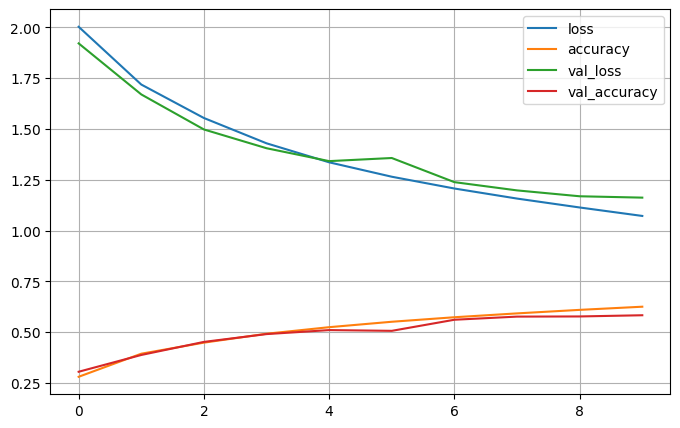

In [164]:
pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

### 3. VGG16

In [87]:

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [88]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [95]:


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [96]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dense_28 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [97]:
conv_base.trainable = False

In [98]:

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [99]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [100]:
history = model.fit(x_train,y_train, epochs=50,batch_size= 64,
                    validation_data=(x_test, y_test),
                validation_steps=50,
                callbacks=[checkpoint_cb])

Epoch 1/50
782/782 [==============================] - 154s 192ms/step - loss: 0.2292 - acc: 0.4963 - val_loss: 0.2141 - val_acc: 0.5281
Epoch 2/50
782/782 [==============================] - 171s 219ms/step - loss: 0.2003 - acc: 0.5681 - val_loss: 0.2043 - val_acc: 0.5459
Epoch 3/50
782/782 [==============================] - 193s 246ms/step - loss: 0.1906 - acc: 0.5869 - val_loss: 0.1982 - val_acc: 0.5669
Epoch 4/50
782/782 [==============================] - 196s 250ms/step - loss: 0.1844 - acc: 0.6017 - val_loss: 0.1923 - val_acc: 0.5775
Epoch 5/50
782/782 [==============================] - 170s 218ms/step - loss: 0.1797 - acc: 0.6136 - val_loss: 0.1913 - val_acc: 0.5769
Epoch 6/50
782/782 [==============================] - 205s 262ms/step - loss: 0.1757 - acc: 0.6236 - val_loss: 0.1908 - val_acc: 0.5753
Epoch 7/50
782/782 [==============================] - 110s 141ms/step - loss: 0.1722 - acc: 0.6315 - val_loss: 0.1820 - val_acc: 0.6081
Epoch 8/50
782/782 [============================

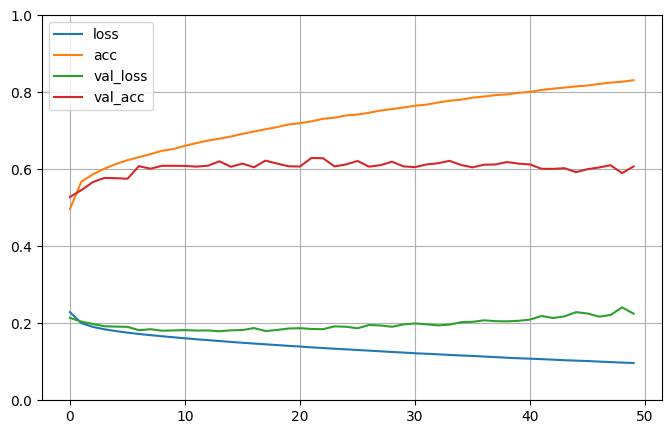

In [101]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [102]:
hist_df = pd.DataFrame(history.history) 

In [103]:
results = model.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 21s 265ms/step - loss: 0.2277 - acc: 0.6117


### 4. Xception

In [138]:
base_model = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3), classes=y_train.shape[1])

83683744/83683744 [==============================] - 74s 1us/step


In [139]:

base_model.trainable = False


In [141]:
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Activation,Dropout,GlobalAveragePooling2D,MaxPooling2D,RandomFlip,RandomZoom,RandomRotation
data_augmentation = Sequential(
    [RandomFlip("horizontal"), 
     RandomRotation(0.1),
     RandomZoom(0.1)]
)

In [147]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224)))(inputs)
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(10, activation=('softmax'))(x)
model = tf.keras.Model(inputs, outputs)

In [148]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0   

In [149]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [151]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 3975s 3s/step - loss: 2.2943 - accuracy: 0.1226 - val_loss: 2.2764 - val_accuracy: 0.1372
Epoch 2/10
1563/1563 [==============================] - 3193s 2s/step - loss: 2.2697 - accuracy: 0.1534 - val_loss: 2.2558 - val_accuracy: 0.2203
Epoch 3/10
 717/1563 [============>.................] - ETA: 9:23:26 - loss: 2.2555 - accuracy: 0.1712

KeyboardInterrupt: 

#### !! Due to running near 10 hours and not yet reaching a promissing accuracy level the model have to be stopped mid process

In [152]:
results = model.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 618s 8s/step - loss: 2.2427 - accuracy: 0.2385


In [153]:
results

[2.2427217960357666, 0.23849999904632568]

### Conclusion

Here the Normal Custom CNN that is implemented without the pooling have the best accuracy of 0.72 and CNN with pooling and VGG16 worked fine with the dataset but the Xception model is too slow, takes very long time and its accuracy is not improving.

### Insights
Here the Dataset works well with CNN models but Xception model is not recommended here. Here the CNN had not much of flaw VGG16 already hited saturation so not further training wont improve the situation.

### Sugestion
Dataset could be expanded to hold more labels and datas. Here VGG16 and Xception models doesn't need further training others could improve. Other complex models can be implemented here.